# The Sparks Foundation
# Data Science & Business Analytics (GRIP June'22)
## Task 6: Prediction using Decision Tree Algorithm
## Done by : Tarun B
## Aim: To create a Decision Tree Classifier and visualize it graphically

### Part 1: Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

### Part 2: Importing & Understanding the Dataset

#### Importing the Dataset

In [2]:
dataset = pd.read_csv("/Users/saimanasraopulakonti/Desktop/Sparks Foundation /Iris.csv")
dataset.head() #this function helps us to view the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Iris Dataset Description

In [3]:
dataset.describe() #to view the statistical data of the iris dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Iris Dataset Info

In [4]:
dataset.info() #prints a concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Dimensions of the Iris Dataset

In [5]:
dataset.shape

(150, 6)

##### We have 150 rows and 6 columns in the Iris Dataset

#### Checking for any missing values in the Iris dataset

In [6]:
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##### There are no missing values in the Iris Dataset

#### Checking for duplicate entries in the Iris Dataset

In [7]:
dataset.duplicated().sum()

0

##### There are no duplicated entries in the Iris Dataset

### Part 3 - Data Visualisation

#### Scatter plot of the data based on the Sepal length and width features

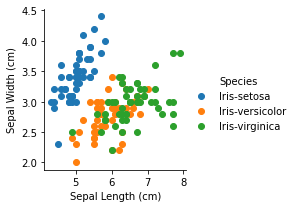

In [8]:
sbn.FacetGrid(dataset,hue="Species").map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

#### Scatter plot of the data based on the Petal length and width features

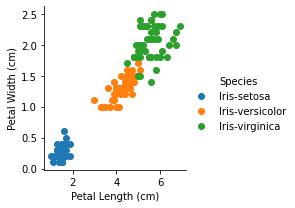

In [9]:
sbn.FacetGrid(dataset,hue="Species").map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

#### Pie plot to show the overall types of Iris classifications

<AxesSubplot:ylabel='Species'>

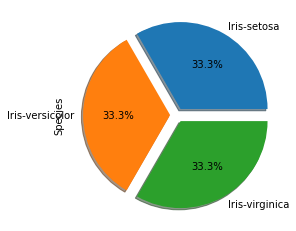

In [10]:
dataset['Species'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, explode = [0.08,0.08,0.08])

### Part 4 - Data Preprocessing

#### Seggregating the Independent and Dependent Variables with the help of iloc function

In [11]:
x = dataset.iloc[:, 1:-1].values #x is the matrix of features
y = dataset.iloc[:,-1].values #y is a vector of observed outcomes

#### Splitting the Iris Dataset into Training Set and Test Set

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
#we would have 30 observation in test set and 120 observations in the training set

### Part 5 - Training the Decision Tree on the Training Set

In [13]:
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

### Part 6 - Visualising the Decision Tree

[Text(418.5, 498.3, 'X[2] <= 2.35\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(354.11538461538464, 407.70000000000005, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(482.8846153846154, 407.70000000000005, 'X[3] <= 1.75\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(257.53846153846155, 317.1, 'X[2] <= 4.95\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(128.76923076923077, 226.5, 'X[3] <= 1.65\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(64.38461538461539, 135.89999999999998, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(193.15384615384616, 135.89999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(386.3076923076923, 226.5, 'X[3] <= 1.55\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(321.9230769230769, 135.89999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(450.69230769230774, 135.89999999999998, 'X[0] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'

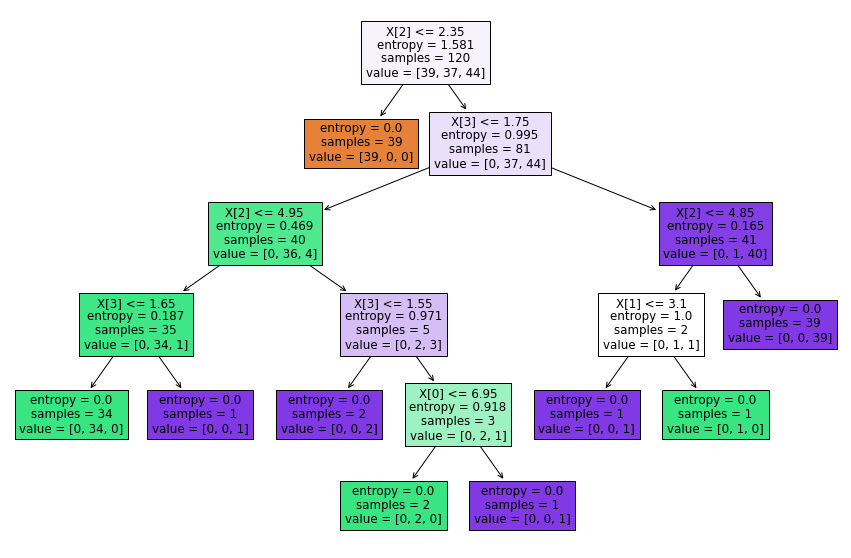

In [14]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier, filled = True)

### Part 7 - Predicting the Test Set Results

In [15]:
y_pred = classifier.predict(x_test) #y_pred is a vector of predicitions of the test set observations

### Part 8 - Predicting the Iris Classification (class) output for a random values for Petal & Sepal length and width

In [16]:
print("Iris Classifications (Class Names) = ",dataset.Species.unique())
print("\nEstimating Class Probabilities")
print("For a flower whose Petals length width are (4.7cm,3.2cm) & Sepal length and width are (1.3cm,0.2cm)")
print('\nThe Model predicts the class as: ',classifier.predict([[4.7, 3.2, 1.3, 0.2]]))

Iris Classifications (Class Names) =  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Estimating Class Probabilities
For a flower whose Petals length width are (4.7cm,3.2cm) & Sepal length and width are (1.3cm,0.2cm)

The Model predicts the class as:  ['Iris-setosa']


### Part 9 - Decision Tree Evaluation & Accuracy

In [17]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
#the confusion matrix will contain the no of correct and wrong predictions by the decision tree
print("\nAccuracy:",metrics.accuracy_score(y_test,y_pred)) #model accuracy

Confusion Matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy: 1.0


### The accuracy of this model is 100% where the Decision Tree was built on 4 features (Petal Length & Width, Sepal Length & Width)

## Conclusion: I was able to successfully train the model and predict new outcomes using the Decision Tree Algorithm and was also able to evaluate the model's accuracy !

## Thank You !